<a href="https://colab.research.google.com/github/ghommidhWassim/mnist_project/blob/main/TensorFlow_MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds


In [21]:

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)


In [22]:
mnist_train, mnsit_test = mnist_dataset['train'], mnist_dataset['test']

In [23]:
num_validation_samples =0.1* mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnsit_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

In [24]:
input_size = 784
output_size = 10
hidden_layer_size = 250
tf.keras.optimizers.Adam(
    learning_rate=0.2)
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                                                        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),

                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 - 8s - 15ms/step - accuracy: 0.9187 - loss: 0.2657 - val_accuracy: 0.9560 - val_loss: 0.1409
Epoch 2/5
540/540 - 4s - 7ms/step - accuracy: 0.9661 - loss: 0.1130 - val_accuracy: 0.9730 - val_loss: 0.0948
Epoch 3/5
540/540 - 3s - 5ms/step - accuracy: 0.9752 - loss: 0.0813 - val_accuracy: 0.9707 - val_loss: 0.1035
Epoch 4/5
540/540 - 3s - 5ms/step - accuracy: 0.9803 - loss: 0.0660 - val_accuracy: 0.9762 - val_loss: 0.0825
Epoch 5/5
540/540 - 6s - 12ms/step - accuracy: 0.9830 - loss: 0.0560 - val_accuracy: 0.9785 - val_loss: 0.0708
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step - accuracy: 0.9712 - loss: 0.1099
Test loss: 0.11. Test accuracy: 97.12%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


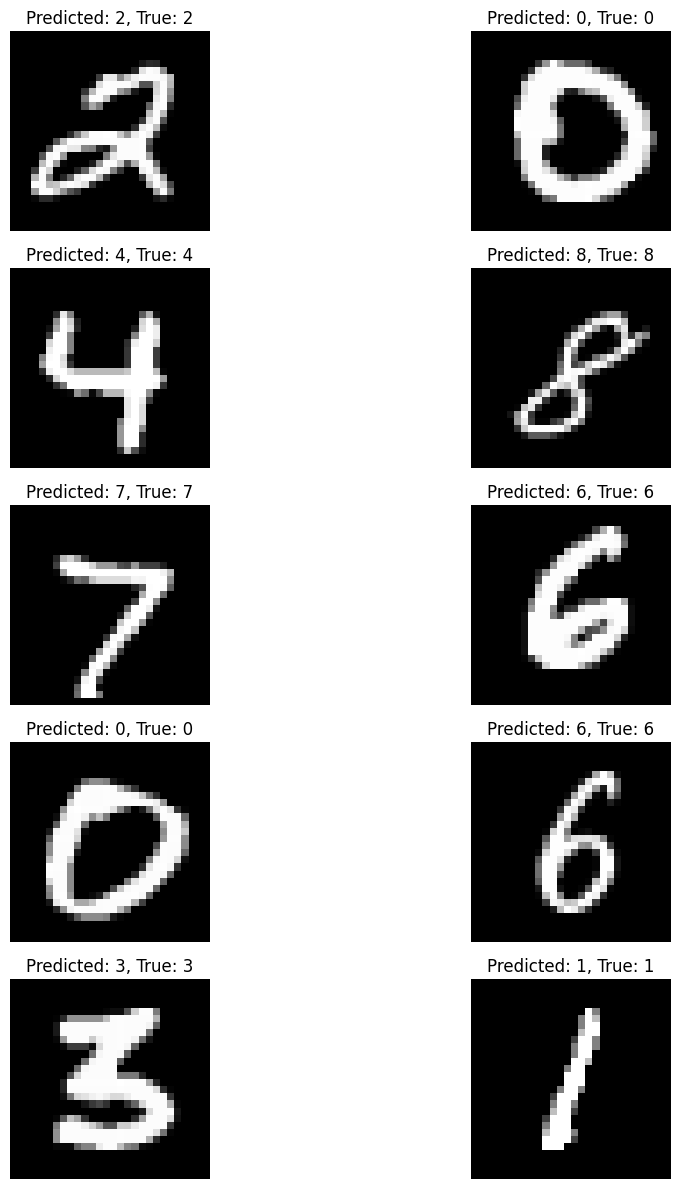

In [25]:
import matplotlib.pyplot as plt

# Get the test dataset (unbatch for visualization)
test_data_unbatched = test_data.unbatch()

# Get predictions and images
probs = model.predict(test_data)
preds = probs.argmax(axis=-1)

plt.figure(figsize=(12, 12))
for i, (image, label) in enumerate(test_data_unbatched.take(10)):
    plt.subplot(5, 2, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"Predicted: {preds[i]}, True: {label.numpy()}")
    plt.axis('off')

plt.tight_layout()
plt.show()
